In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pylab as plt  

from sklearn import preprocessing  

%matplotlib inline  

from sklearn.decomposition import PCA  
from sklearn.impute import KNNImputer  
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix  
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error   #RMSE
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

from adjustText import adjust_text  

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)  

In [2]:
df=pd.read_csv(r'C:\Users\mailk\Downloads\ratings.csv')
df=df.astype('int64')

In [3]:
df.head()

,userId,bookId,rating
0,1,1,4
1,1,3,4
2,1,6,4
3,1,47,5
4,1,50,5


In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace('[^A-Za-z\s]+','')

In [5]:
for x in ['bookid','rating']:
    print('-'*50)
    print(x)
    print(df[x].value_counts(dropna=False)) 
    print('-'*50)

--------------------------------------------------
bookid
1      224
50     213
47     209
32     190
10     137
34     135
39     120
2      118
6      114
16      99
21      95
95      92
19      92
62      90
25      88
11      79
36      75
48      74
17      73
7       64
70      62
3       59
5       59
44      54
22      48
45      45
31      45
58      44
60      44
52      42
29      42
65      36
24      35
69      34
88      31
18      28
79      28
23      27
14      27
9       26
86      25
46      25
12      24
73      24
66      23
15      23
41      23
76      23
28      21
93      21
4       20
20      20
100     20
81      20
97      19
92      19
63      19
57      18
61      18
8       18
13      17
26      17
89      17
43      16
42      15
87      15
85      15
78      14
72      14
27      14
75      14
71      13
38      13
94      13
30      13
83      13
84      13
96      13
33      12
35      11
74      11
82      11
64      11
91      10
99      10
53     

In [6]:
y=df['rating']

In [7]:
train_X, valid_X, train_y, valid_y = train_test_split(df, y, test_size=0.4, random_state=1)
print('Training set:', train_X.shape, 'Validation set:', valid_X.shape)

Training set: (2440, 3) Validation set: (1627, 3)


In [8]:
train_y

3405    4
981     2
3429    1
1153    5
3202    2
       ..
3839    3
1096    1
3980    4
235     4
1061    2
Name: rating, Length: 2440, dtype: int64

In [9]:
cols = ['userid','bookid']

In [10]:
train_X1 = train_X[cols] 
valid_X1 = valid_X[cols] 

In [11]:
#scaling the training dataset
scaler = preprocessing.MinMaxScaler()
scaler.fit(train_X1.iloc[:,:-1])
train_X1_scaled=pd.DataFrame(scaler.transform(train_X1.iloc[:,:-1]), columns=train_X1.columns[:-1])
valid_X1_scaled=pd.DataFrame(scaler.transform(valid_X1.iloc[:,:-1]), columns=valid_X1.columns[:-1])

In [12]:
train_X1_scaled 

,userid
0,0.842365
1,0.233169
2,0.850575
3,0.279146
4,0.791461
...,...
2435,0.973727
2436,0.262726
2437,0.988506
2438,0.050903


In [13]:
valid_X1_scaled=pd.DataFrame(scaler.transform(valid_X1.iloc[:,:-1]), columns=valid_X1.columns[:-1])

In [14]:
valid_X1_scaled

,userid
0,0.983580
1,0.707718
2,0.464696
3,0.732348
4,0.602627
...,...
1622,0.756979
1623,0.628900
1624,0.407225
1625,0.658456


In [15]:
df=df.drop(columns='rating')

In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4067 entries, 0 to 4066
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   userid  4067 non-null   int64
 1   bookid  4067 non-null   int64
dtypes: int64(2)
memory usage: 63.7 KB


In [18]:
df_Test = df[cols]

In [19]:
df_Test_scaled=pd.DataFrame(scaler.transform(df_Test.iloc[:,:-1]), columns=df_Test.columns[:-1])

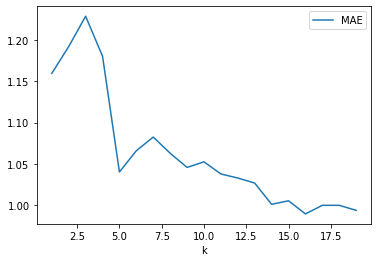

In [22]:
# Train a Classifier for different values of k using train_X1_scaled
results = []
for k in range(1,20):
        knn = KNeighborsClassifier(n_neighbors=k,n_jobs=1).fit(train_X1_scaled, train_y)
        results.append({
            'k': k,
            'MAE': mean_absolute_error(valid_y, knn.predict(valid_X1_scaled))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results.sort_values(by='MAE')
results.index=results.k
results=results.drop('k',axis=1)
results.plot()

In [23]:
# Train a classifier for different values of k and metric list train_X1_scaled(made from df_starsNotnull)
metric_list=['euclidean','manhattan','chebyshev','minkowski',]
results = []
for k in range(1,20):
    for m in metric_list:
        knn = KNeighborsClassifier(n_neighbors=k,metric=m,n_jobs=-1).fit(train_X1_scaled, train_y)
        results.append({
            'k_distance': str(k)+" "+str(m),
            'MAE': mean_absolute_error(valid_y, knn.predict(valid_X1_scaled))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results.sort_values(by='MAE')
#results.index=results.k_distance
#results=results.drop('k_distance',axis=1)
#results.plot()

,k_distance,MAE
60,16 euclidean,0.988937
61,16 manhattan,0.988937
62,16 chebyshev,0.988937
63,16 minkowski,0.988937
75,19 minkowski,0.993239
73,19 manhattan,0.993239
72,19 euclidean,0.993239
74,19 chebyshev,0.993239
65,17 manhattan,0.999385
64,17 euclidean,0.999385


In [24]:
# train knn model on train dataset using Classifier using k=5 and distance metris as minkowski got from the above results. 
#train_X1_scaled(made from df_starsNotnull) 
knn_classify = KNeighborsClassifier(n_neighbors=16,metric='euclidean',n_jobs=-1)
knn_classify.fit(train_X1_scaled, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=16, p=2,
                     weights='uniform')

In [25]:
classifiedRatings=knn_classify.predict(df_Test_scaled)

In [26]:
classified_Ratings = pd.DataFrame(classifiedRatings)

In [27]:
classified_Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4067 entries, 0 to 4066
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4067 non-null   int64
dtypes: int64(1)
memory usage: 31.9 KB


In [28]:
classified_Ratings.describe()

,0
count,4067.000000
mean,3.538235
std,0.831441
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


In [31]:
classified_Ratings.head(45)

,0
0,4
1,4
2,4
3,4
4,4
5,4
6,4
7,4
8,4
9,4


In [33]:
classified_Ratings.reset_index(drop=True, inplace=True)

In [34]:
Ratings_classified=pd.concat([df,classified_Ratings],axis=1,sort=False)
Ratings_classified.head()

,userid,bookid,0
0,1,1,4
1,1,3,4
2,1,6,4
3,1,47,4
4,1,50,4


In [35]:
Ratings_classified.rename(columns={0:'RATINGS'}, inplace=True)
Ratings_classified.info()
Ratings_classified.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4067 entries, 0 to 4066
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   userid   4067 non-null   int64
 1   bookid   4067 non-null   int64
 2   RATINGS  4067 non-null   int64
dtypes: int64(3)
memory usage: 95.4 KB


,userid,bookid,RATINGS
0,1,1,4
1,1,3,4
2,1,6,4
3,1,47,4
4,1,50,4


In [54]:
Ratings_classified.to_csv('df_final.csv')